<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook demonstrates the use of simple and multiple linear regression

In [6]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

# Example 1. Simple Regression (one Factor)

In [7]:
# the data file is in Github
# Montgomery 7ed Example 4.5.1
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/paper%20strength%20one-way%20ANOVA.csv', sep=',', na_values=".")

data  

,Obs,Conc,Strength
0,1,5,7
1,2,5,8
2,3,5,15
3,4,5,11
4,5,5,9
5,6,5,10
6,1,10,12
7,2,10,17
8,3,10,13
9,4,10,18


In [8]:
#1st example: simple linear regression with one variable
#there is only variable or factor: hardwood conceptration; 
#you can also use C(Conc) in the model statement to generate a more specific output
#response: strength

model = ols('Strength ~ Conc', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     53.76
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           2.43e-07
Time:                        20:08:54   Log-Likelihood:                -55.961
No. Observations:                  24   AIC:                             115.9
Df Residuals:                      22   BIC:                             118.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2500      1.301      5.573      0.0

# The p value for factor Conc is 0.000 so that its beta is significant at 100% level. It means Concentration level afftects paper strength. This is similar to F test used in the One-Way ANOVA table that H0: mu5=mu10=mu15=mu20 is rejected.

# Example 2. Multiple Regression (more than one Factor)

In [9]:
#Example 4.13 is from Montgomery 7ed pp 161 for fitting linear regression for two factors 
data2 = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/Example4_13.csv', sep=',', na_values=".")

data2 

,x1,x2,Cost
0,80,8,2256
1,93,9,2340
2,100,10,2426
3,82,12,2293
4,90,11,2330
5,99,8,2368
6,81,8,2250
7,96,10,2409
8,94,12,2364
9,93,11,2379


In [10]:
# fit the two factor linear regression
model2 = ols('Cost ~ x1 + x2', data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     82.50
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           4.10e-08
Time:                        20:08:54   Log-Likelihood:                -65.758
No. Observations:                  16   AIC:                             137.5
Df Residuals:                      13   BIC:                             139.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1566.0778     61.592     25.427      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Your Turn
1. Is factor X1 significant?
2. Is factor x2 significant?
3. What is the y-hat equation to estimate cost?
3. What is the estimated cost for (x1, x2)=(100, 9)

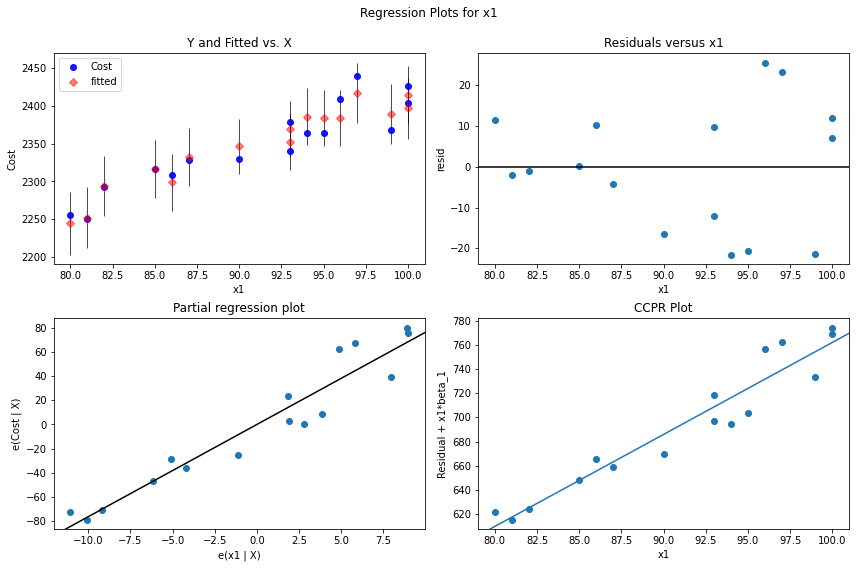

In [11]:
#Residual plot based on the first variable x1
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model2, 'x1', fig=fig)

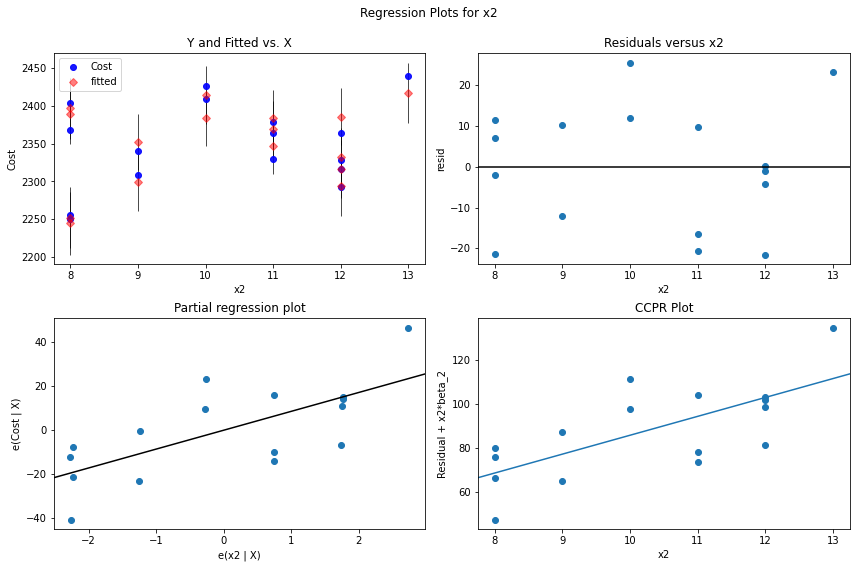

In [12]:
#Residual plot based on the second variable x2
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model2, 'x2', fig=fig)

Three tests should be performed based on residual analysis. 1. Normal Probabilty Plot for normality check 2. Residual vs x1 and residuals vs x2 plots for considant variance and 3. residual vs time order of data collection for independence. Note that the third check requires the knowledge of when each observation is collected. The above res vs x1 and x2 plots show constant variance

In [13]:
# obtain residuals

eij=model2.resid

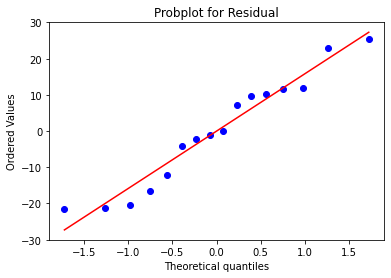

In [14]:
# probability plot for one variable
# stats.probplot use the default distribution normal prob if not specified

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(eij, plot=ax)
ax.set_title("Probplot for Residual")
plt.show()

In [15]:
# testing the random oder for collecting observations
# Minitab call the order variable, run order
import random
c=list(range(1, 17))
order=random.sample(c, 16)
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[7, 13, 9, 11, 4, 6, 8, 5, 14, 2, 16, 3, 1, 12, 10, 15]


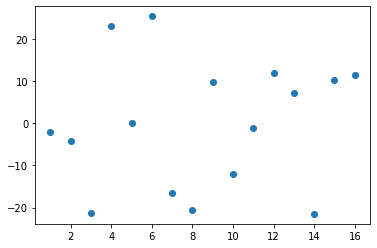

In [16]:
# assume that this random order is how we collected the data in time sequence
# if there is no pattern in the scatter plot, then don't reject independence assumption
import random
N = len(eij)
c = list(range(1, 17))
x = random.sample(c, 16) #this should be replaced by the exact run order
y = eij

plt.scatter(x, y)
#plt.show()

In [17]:
# use linear algebra to estimate beta
# first create a column of 1s but it is list
# conver the list into an array
# Example 4.13 pp 161 Montgomery 7ed
one=np.array([1]*16)
one


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
x1=np.array(data2['x1'])
x2=np.array(data2['x2'])
Xp=np.asmatrix([one, x1, x2])
Xp

matrix([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1],
        [ 80,  93, 100,  82,  90,  99,  81,  96,  94,  93,  97,  95, 100,
          85,  86,  87],
        [  8,   9,  10,  12,  11,   8,   8,  10,  12,  11,  13,  11,   8,
          12,   9,  12]])

In [19]:
X=Xp.transpose()
X

matrix([[  1,  80,   8],
        [  1,  93,   9],
        [  1, 100,  10],
        [  1,  82,  12],
        [  1,  90,  11],
        [  1,  99,   8],
        [  1,  81,   8],
        [  1,  96,  10],
        [  1,  94,  12],
        [  1,  93,  11],
        [  1,  97,  13],
        [  1,  95,  11],
        [  1, 100,   8],
        [  1,  85,  12],
        [  1,  86,   9],
        [  1,  87,  12]])

In [20]:
XpX=np.matmul(Xp, X)
XpX

matrix([[    16,   1458,    164],
        [  1458, 133560,  14946],
        [   164,  14946,   1726]])

In [21]:
Y=np.array(data2['Cost'])
Y=Y.transpose()
XpY= np.matmul(Xp, Y)
XpY

matrix([[  37577, 3429550,  385562]])

In [22]:
# inverse of the X' * X matrix
XXinv=np.linalg.inv(XpX)

In [23]:
# compute the beta estimation
beta=np.matmul(XXinv, XpY.transpose())
beta

matrix([[1566.07777143],
        [   7.62129008],
        [   8.58484589]])

In [24]:
beta.shape

(3, 1)

In [25]:
betap=beta.transpose()
betap.shape

(1, 3)

In [26]:
# SSR
Y=np.array(data2['Cost'])
#np.matmul(Y.transpose(), Y)
B=np.matmul(Y, Y)

In [27]:
# beta' * X'Y
C=np.matmul(beta.transpose(), XpY.transpose())

In [28]:
# MSE
SSE=B-C
n=16
p=3
MSE= SSE/(n-p)

print('MSE=SSE/(n-p)= %s' %MSE)

MSE=SSE/(n-p)= [[267.60392024]]


In [29]:
# SST
D = Y*Y
D= D.sum()
E=(Y.sum())**2/n
SST = D-E
SSR= SST - SSE

print('SSR= %s' %SSR)
print('SSE= %s' %SSE)
print('SST= %s' %SST)

SSR= [[44157.08653685]]
SSE= [[3478.85096315]]
SST= 47635.9375


In [30]:
# MSR & F/pval
# this result provides the ANOVA table for this multiple linear regression
MSR = SSR/(p-1)
F0=MSR/MSE
# compute p value of F0
pval=1-scipy.stats.f.cdf(F0,p-1, n-p) #find p-value of F test statistics
print('MSR= %s' %MSR)
print('F0= %s' %F0)
print('p val= %s' %pval)

MSR= [[22078.54326843]]
F0= [[82.50455841]]
p val= [[4.0997483e-08]]


# The F test shows that at least one of the betas is non-zero so the factors affect the cost